## Applying MacSGP to detect cell-type-specific SGPs

In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import os

import warnings
warnings.filterwarnings("ignore")

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import sys
sys.path.append(r'/import/home2/share/yqzeng/MacSGP/codes')
import MacSGP

In [4]:
DATA_PATH = "/import/home2/share/yqzeng/MacSGP/data/Mouth_brain_visium" # Raw data
SAVE_PATH = "/import/home2/share/yqzeng/MacSGP/Results/Mouth_brain_visium" # Deconvolution results
os.makedirs(os.path.join(SAVE_PATH), exist_ok = True)

## Visium Slice 1

In [9]:
adata_st = ad.read_h5ad(os.path.join(DATA_PATH, "visium_1.h5ad"))
adata_basis = ad.read_h5ad(os.path.join(DATA_PATH, "visium_1_basis.h5ad"))

In [11]:
model = MacSGP.model.Model(adata_st, adata_basis, n_layers=4, training_steps=3000, coef_reg=200/18, estimate_gamma=False, estimate_alpha=False)

model.train(step_interval=200)
adata_result = model.eval()

  0%|          | 2/3000 [00:00<08:03,  6.20it/s]

Step: 0, Loss: -5790.6089, d_loss: -5795.3467, f_loss: 47.3751, reg_loss: 0.0001


  7%|▋         | 202/3000 [00:32<07:29,  6.22it/s]

Step: 200, Loss: -5977.6548, d_loss: -5982.3721, f_loss: 23.6247, reg_loss: 0.2120


 13%|█▎        | 402/3000 [01:04<06:57,  6.22it/s]

Step: 400, Loss: -6040.8159, d_loss: -6049.4443, f_loss: 22.5055, reg_loss: 0.5740


 20%|██        | 602/3000 [01:36<06:25,  6.22it/s]

Step: 600, Loss: -6064.8911, d_loss: -6073.7119, f_loss: 22.0698, reg_loss: 0.5952


 27%|██▋       | 802/3000 [02:08<05:53,  6.21it/s]

Step: 800, Loss: -6078.7075, d_loss: -6088.3257, f_loss: 21.8117, reg_loss: 0.6693


 33%|███▎      | 1002/3000 [02:40<05:21,  6.21it/s]

Step: 1000, Loss: -6088.5376, d_loss: -6099.4683, f_loss: 21.6742, reg_loss: 0.7887


 40%|████      | 1202/3000 [03:13<04:49,  6.21it/s]

Step: 1200, Loss: -6095.9106, d_loss: -6107.9111, f_loss: 21.5549, reg_loss: 0.8860


 47%|████▋     | 1402/3000 [03:45<04:17,  6.21it/s]

Step: 1400, Loss: -6101.7568, d_loss: -6114.5728, f_loss: 21.4645, reg_loss: 0.9602


 53%|█████▎    | 1602/3000 [04:17<03:45,  6.21it/s]

Step: 1600, Loss: -6105.0503, d_loss: -6118.5103, f_loss: 21.3848, reg_loss: 1.0189


 60%|██████    | 1802/3000 [04:49<03:12,  6.22it/s]

Step: 1800, Loss: -6108.7285, d_loss: -6122.6597, f_loss: 21.3052, reg_loss: 1.0621


 67%|██████▋   | 2002/3000 [05:21<02:40,  6.21it/s]

Step: 2000, Loss: -6110.9966, d_loss: -6125.4316, f_loss: 21.2418, reg_loss: 1.1080


 73%|███████▎  | 2202/3000 [05:53<02:08,  6.21it/s]

Step: 2200, Loss: -6112.6841, d_loss: -6127.4829, f_loss: 21.1840, reg_loss: 1.1413


 80%|████████  | 2402/3000 [06:25<01:36,  6.21it/s]

Step: 2400, Loss: -6114.4009, d_loss: -6129.3721, f_loss: 21.1274, reg_loss: 1.1573


 87%|████████▋ | 2602/3000 [06:57<01:04,  6.21it/s]

Step: 2600, Loss: -6115.5244, d_loss: -6130.7295, f_loss: 21.0863, reg_loss: 1.1787


 93%|█████████▎| 2802/3000 [07:30<00:31,  6.21it/s]

Step: 2800, Loss: -6116.4810, d_loss: -6131.8643, f_loss: 21.0401, reg_loss: 1.1951


100%|██████████| 3000/3000 [08:01<00:00,  6.23it/s]


In [13]:
adata_result.write_h5ad(os.path.join(SAVE_PATH, "visium_1_result.h5ad"))

In [14]:
adata_result_1 = ad.read_h5ad(os.path.join(SAVE_PATH, "visium_1_result.h5ad"))

In [ ]:
ct_plot = ['Astro_HPC','Astro_HYPO','Ext_Amy_2','Ext_Hpc_CA1','Ext_Hpc_CA3','Ext_Hpc_DG1',
 'Ext_L23','Ext_L5_1','Ext_L5_2','Ext_L6','Ext_Med','Ext_Pir','Ext_Thal_1','Ext_Thal_2','Inh_1','Inh_3','Inh_4','Inh_Meis2_3','Oligo_1','Oligo_2']

Dropping cell types: []


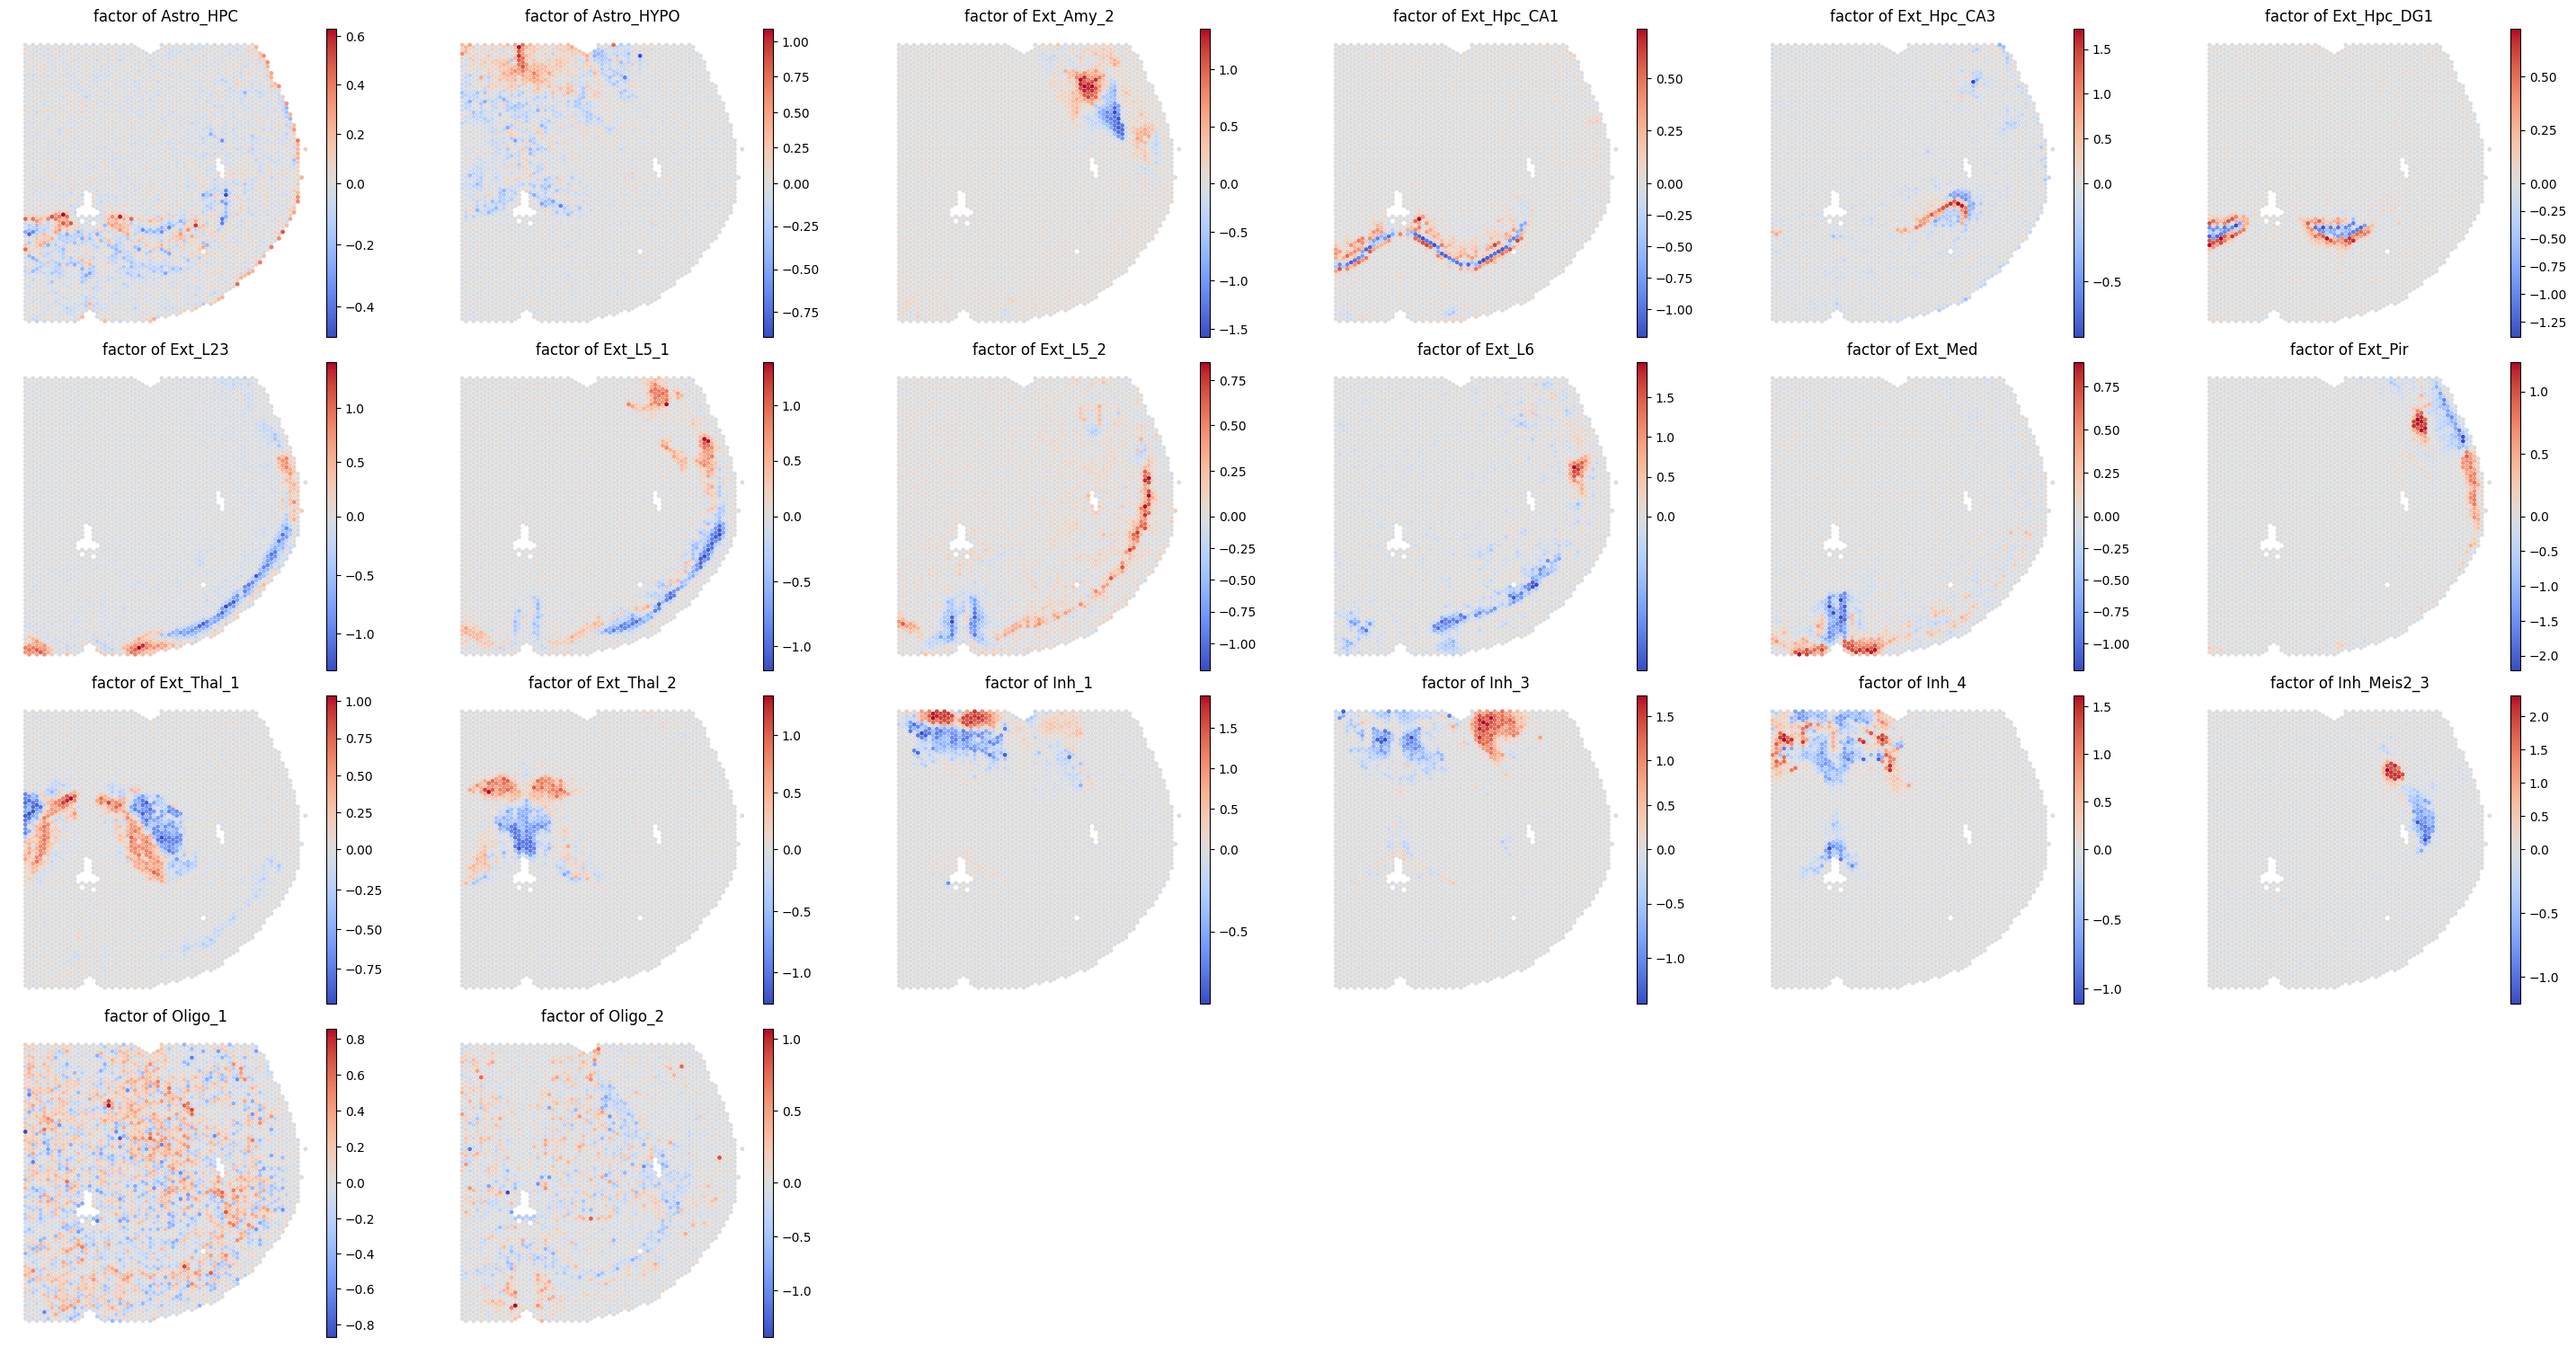

In [15]:
from MacSGP.vis import plot_spatial_ct

plot_spatial_ct(adata_result_1, index='factor', celltype_plot=ct_plot,
                proportion_threshold=0.0, num_threshold=100, 
                cmap='coolwarm', 
                spot_size=100, 
                ncols=6)

## Visium Slice 2

In [16]:
adata_st = ad.read_h5ad(os.path.join(DATA_PATH, "visium_2.h5ad"))
adata_basis = ad.read_h5ad(os.path.join(DATA_PATH, "visium_2_basis.h5ad"))

In [17]:
model = MacSGP.model.Model(adata_st, adata_basis, n_layers=4, training_steps=3000, coef_reg=200/18, estimate_gamma=False, estimate_alpha=False)

model.train(step_interval=200)
adata_result = model.eval()

  0%|          | 2/3000 [00:00<07:37,  6.55it/s]

Step: 0, Loss: -5028.1938, d_loss: -5032.9385, f_loss: 47.4430, reg_loss: 0.0001


  7%|▋         | 202/3000 [00:30<07:06,  6.55it/s]

Step: 200, Loss: -5207.4741, d_loss: -5212.9810, f_loss: 24.7534, reg_loss: 0.2728


 13%|█▎        | 402/3000 [01:01<06:36,  6.56it/s]

Step: 400, Loss: -5264.3760, d_loss: -5272.2832, f_loss: 23.3861, reg_loss: 0.5012


 20%|██        | 602/3000 [01:31<06:05,  6.56it/s]

Step: 600, Loss: -5289.7632, d_loss: -5298.1909, f_loss: 23.0226, reg_loss: 0.5513


 27%|██▋       | 802/3000 [02:02<05:34,  6.56it/s]

Step: 800, Loss: -5304.3599, d_loss: -5313.8276, f_loss: 22.8031, reg_loss: 0.6469


 33%|███▎      | 1002/3000 [02:32<05:04,  6.56it/s]

Step: 1000, Loss: -5313.4321, d_loss: -5323.6919, f_loss: 22.6221, reg_loss: 0.7198


 40%|████      | 1202/3000 [03:02<04:34,  6.56it/s]

Step: 1200, Loss: -5320.4443, d_loss: -5331.3726, f_loss: 22.4931, reg_loss: 0.7811


 47%|████▋     | 1402/3000 [03:33<04:03,  6.56it/s]

Step: 1400, Loss: -5325.6240, d_loss: -5337.1919, f_loss: 22.3979, reg_loss: 0.8395


 53%|█████▎    | 1602/3000 [04:03<03:33,  6.56it/s]

Step: 1600, Loss: -5328.9380, d_loss: -5341.2715, f_loss: 22.3486, reg_loss: 0.9089


 60%|██████    | 1802/3000 [04:34<03:02,  6.56it/s]

Step: 1800, Loss: -5332.3516, d_loss: -5345.2651, f_loss: 22.2344, reg_loss: 0.9621


 67%|██████▋   | 2002/3000 [05:04<02:32,  6.56it/s]

Step: 2000, Loss: -5334.5977, d_loss: -5348.0098, f_loss: 22.1766, reg_loss: 1.0075


 73%|███████▎  | 2202/3000 [05:34<02:01,  6.56it/s]

Step: 2200, Loss: -5336.3096, d_loss: -5350.1899, f_loss: 22.1227, reg_loss: 1.0501


 80%|████████  | 2402/3000 [06:05<01:31,  6.55it/s]

Step: 2400, Loss: -5337.7339, d_loss: -5351.9004, f_loss: 22.0732, reg_loss: 1.0763


 87%|████████▋ | 2602/3000 [06:35<01:00,  6.56it/s]

Step: 2600, Loss: -5338.4473, d_loss: -5352.9238, f_loss: 22.0478, reg_loss: 1.1045


 93%|█████████▎| 2802/3000 [07:06<00:30,  6.56it/s]

Step: 2800, Loss: -5339.7007, d_loss: -5354.2974, f_loss: 21.9903, reg_loss: 1.1158


100%|██████████| 3000/3000 [07:36<00:00,  6.57it/s]


In [18]:
adata_result.write_h5ad(os.path.join(SAVE_PATH, "visium_2_result.h5ad"))

Dropping cell types: []


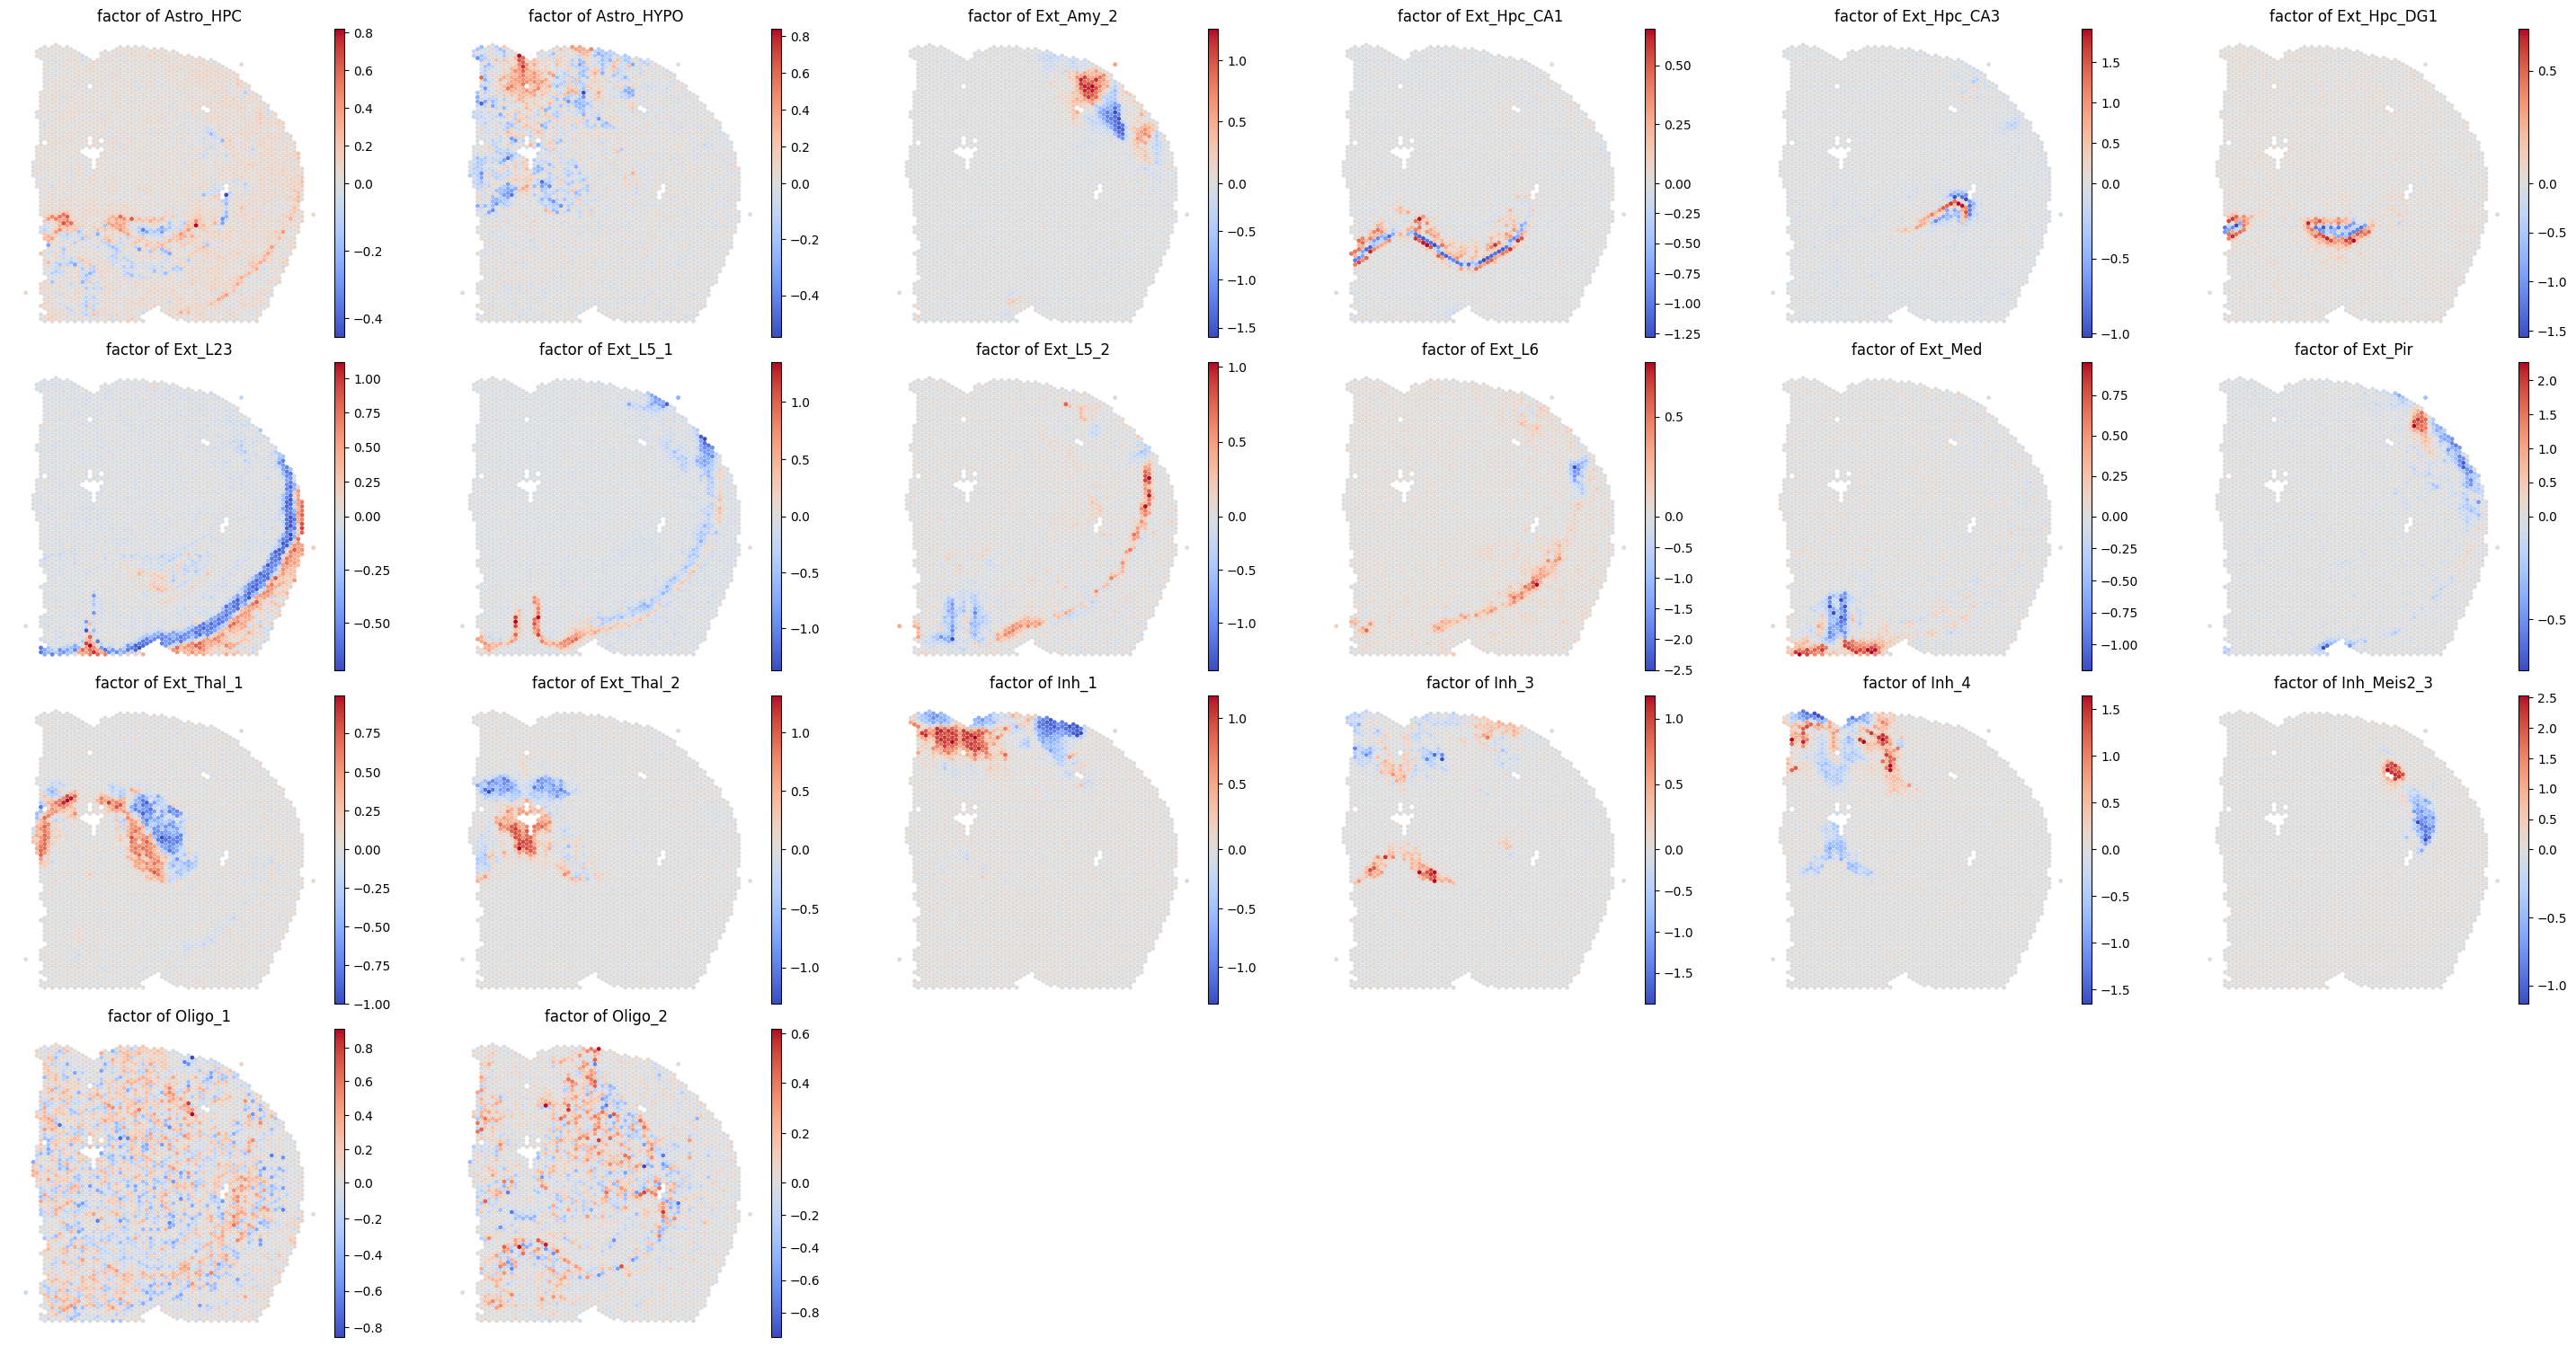

In [20]:
from MacSGP.vis import plot_spatial_ct

plot_spatial_ct(adata_result, index='factor', celltype_plot=ct_plot,
                proportion_threshold=0.0, num_threshold=100, 
                cmap='coolwarm', 
                spot_size=100, 
                ncols=6)